In [1]:
import numpy as np
import pandas as pd
import os

from rdkit import Chem

import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)

In [22]:
# endpoint = '00_eye-substructures'
# endpoint = 'eye-irritation'
endpoint = 'skin-sensitization'

loc = r'D:\School\Semester3\Seminar - Reproducibility\seminar-toxicity\data'
endpoint_loc = os.path.join(loc, endpoint)

In [23]:
filename = 'output_substructures.csv'
df_sub = pd.read_csv(os.path.join(endpoint_loc, filename))

In [24]:
df_sub.head()

,Fragment,Sum(True Positives),Sum(False Positives)
0,N(-c1:c:c:c(:c:c:1)-N)(-C)-C,41.0,1.0
1,Cl-C-C=O,40.0,3.0
2,O1-C(-C-1)-C-O-C,34.0,3.0
3,N(-C)=C=O,30.0,2.0
4,Cl-c1:n:c:n:c:n:1,34.0,4.0


In [25]:
df_sub['PPV'] = df_sub['Sum(True Positives)']/(df_sub['Sum(True Positives)'] + df_sub['Sum(False Positives)'])

In [26]:
df_sub.head()

,Fragment,Sum(True Positives),Sum(False Positives),PPV
0,N(-c1:c:c:c(:c:c:1)-N)(-C)-C,41.0,1.0,0.976190
1,Cl-C-C=O,40.0,3.0,0.930233
2,O1-C(-C-1)-C-O-C,34.0,3.0,0.918919
3,N(-C)=C=O,30.0,2.0,0.937500
4,Cl-c1:n:c:n:c:n:1,34.0,4.0,0.894737


In [27]:
df = df_sub.sort_values(by=['Sum(True Positives)'], ascending=False)

mol no : 1 smiles : N(-c1:c:c:c(:c:c:1)-N)(-C)-C
41.0 0.9761904761904762


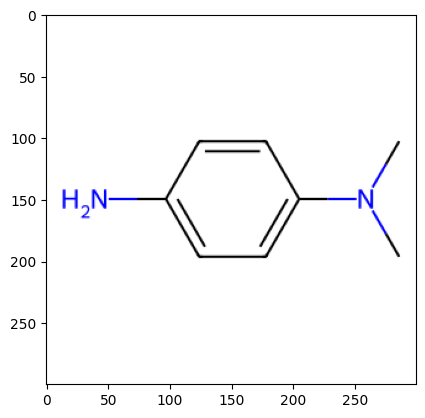

mol no : 2 smiles : Cl-C-C=O
40.0 0.9302325581395349


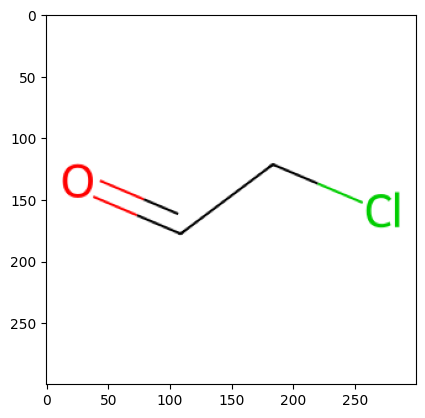

mol no : 3 smiles : O-c1:c(:c:c:c(:c:1)-C)-O
36.0 0.8372093023255814


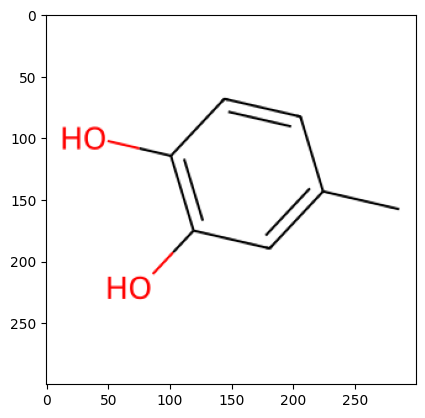

mol no : 4 smiles : O1-C(-C-1)-C-O-C
34.0 0.918918918918919


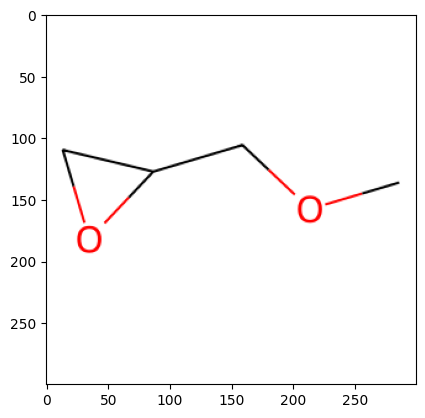

mol no : 5 smiles : Cl-c1:n:c:n:c:n:1
34.0 0.8947368421052632


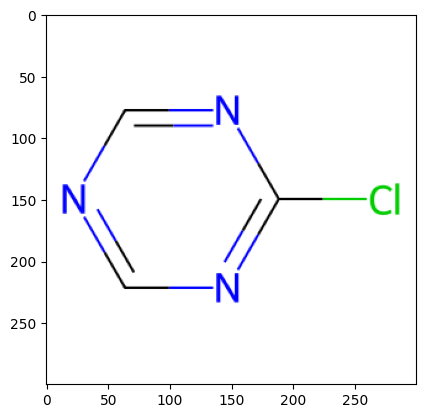

mol no : 6 smiles : N(-C)=C=O
30.0 0.9375


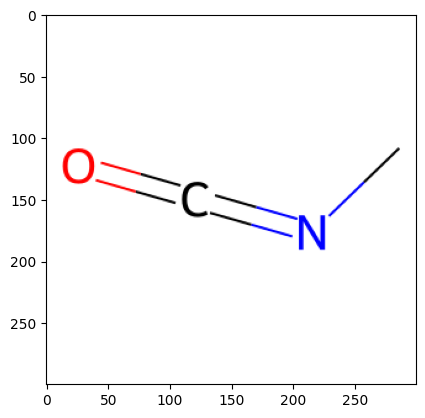

mol no : 7 smiles : O(-C(-C=C)=O)-C-C-O
25.0 0.8620689655172413


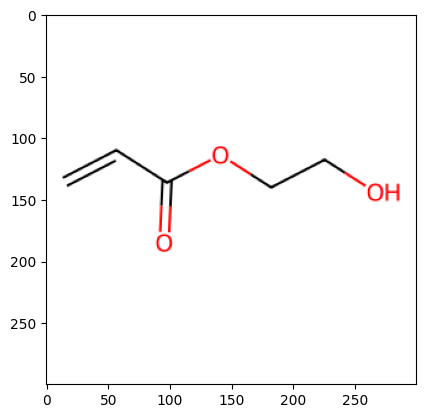

mol no : 8 smiles : Cl-C-c1:c:c:c:c:c:1
22.0 0.9565217391304348


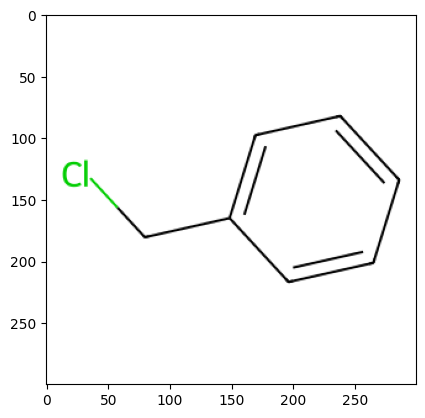

mol no : 9 smiles : O(-O-C)-C=O
21.0 0.9130434782608695


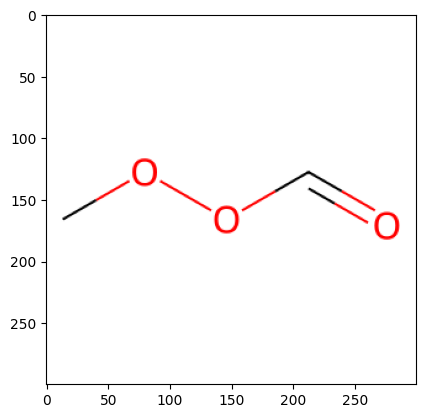

mol no : 10 smiles : N(-O)(-c1:c:c(:c:c:c:1)-N(-O)=O)=O
19.0 0.9047619047619048
mol no : 11 smiles : Br-C-C=O
17.0 1.0


[12:28:53] Explicit valence for atom # 0 N, 4, is greater than permitted


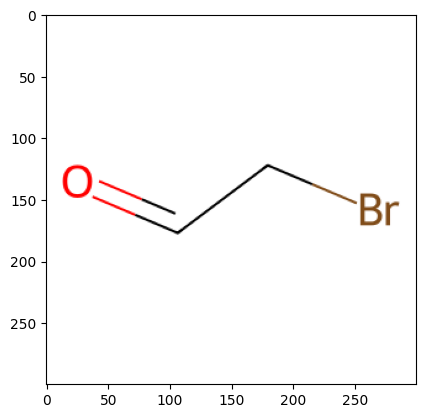

mol no : 12 smiles : N(-O-C)=C
17.0 1.0


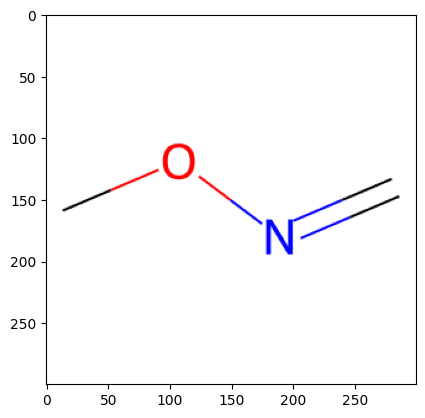

mol no : 13 smiles : S(-C=O)-C
15.0 0.9375


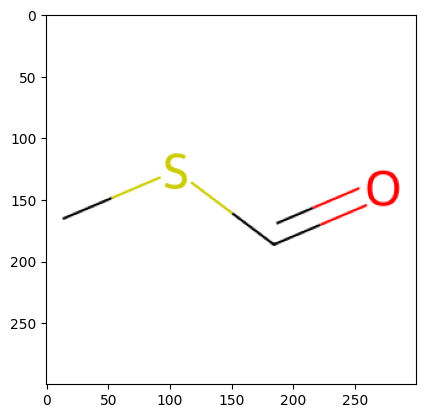

mol no : 14 smiles : O1-C(-C-C-C-1=O)=O
14.0 0.9333333333333333


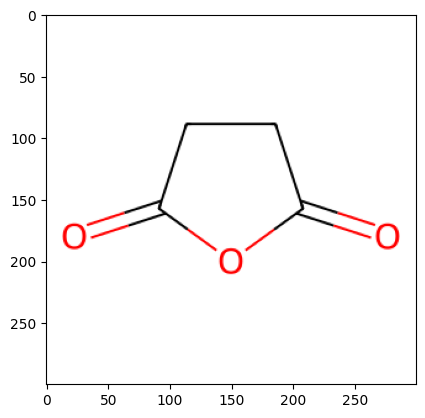

mol no : 15 smiles : O=C-C-C-C-C-C=C-C-C
11.0 0.8461538461538461


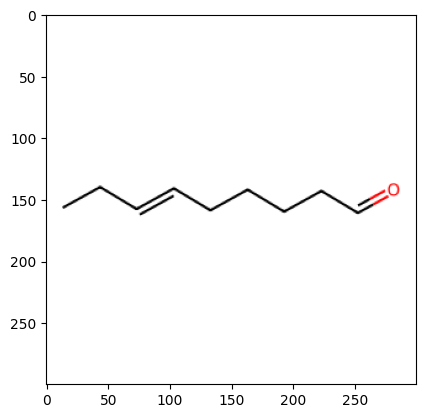

In [28]:
for i in range(15):
    sm = df['Fragment'].iloc[i]
    print(f'mol no : {i+1} smiles : {sm}')
    print(df['Sum(True Positives)'].iloc[i], df['PPV'].iloc[i]) 
    mol = Chem.MolFromSmiles(df['Fragment'].iloc[i])
    if mol is not None:
        img = Chem.Draw.MolToImage(mol)    
        plt.imshow(img)
        plt.show()

In [29]:
sa = df[df['PPV']>0.8]

In [30]:
sa

,Fragment,Sum(True Positives),Sum(False Positives),PPV
0,N(-c1:c:c:c(:c:c:1)-N)(-C)-C,41.0,1.0,0.976190
1,Cl-C-C=O,40.0,3.0,0.930233
11,O-c1:c(:c:c:c(:c:1)-C)-O,36.0,7.0,0.837209
2,O1-C(-C-1)-C-O-C,34.0,3.0,0.918919
4,Cl-c1:n:c:n:c:n:1,34.0,4.0,0.894737
...,...,...,...,...
62,N#C-c1:c:c:c(:c:c:1)-O,4.0,0.0,1.000000
63,N(-C)=C-C(-C-O-C-C)-C,4.0,0.0,1.000000
65,P(-O)(-O)(-C-P(-O)(-O)=O)=O,4.0,0.0,1.000000
66,Cl-c1:n:c:n:c(:c:1)-Cl,4.0,0.0,1.000000


In [31]:
sa['Sum(True Positives)'].sum()

774.0

In [32]:
(sa['Sum(False Positives)'] > 0).sum()

31

In [33]:
sa['Sum(False Positives)'].sum()

51.0

In [34]:
sa['Sum(True Positives)'].sum()/(sa['Sum(True Positives)'].sum() + sa['Sum(False Positives)'].sum())

0.9381818181818182